In [2]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.interpolate import interp1d

def southpole(z, A = 1.78, B = -0.43, C = -0.0132):
    '''
    Function returns analytical south pole function

    Input:
    z : depth

    output:
    n : refractive index (real)
    '''

    return A+B*np.exp(C*z)

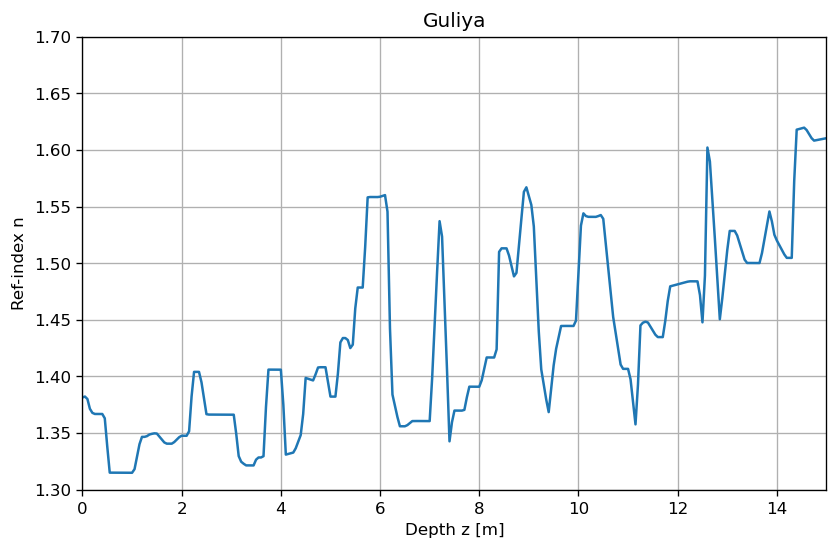

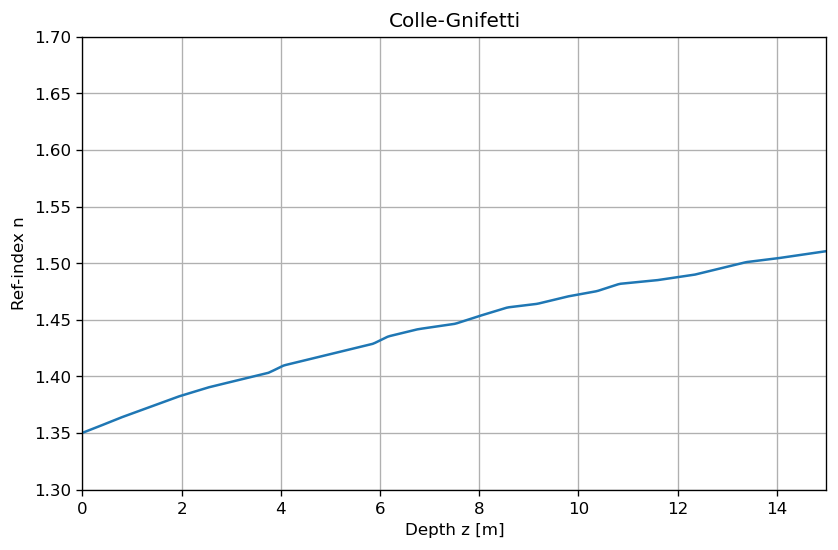

In [6]:
gul_data = np.genfromtxt('guliya.txt')
z_gul = gul_data[:,0]
n_gul = gul_data[:,1]
pl.figure(figsize=(8,5),dpi=120)
pl.title('Guliya')
pl.plot(z_gul, n_gul)
pl.xlim(0,15)
pl.ylim(1.3,1.7)
pl.grid()
pl.xlabel('Depth z [m]')
pl.ylabel('Ref-index n')
pl.show()

cg_data = np.genfromtxt('colle-gnifetti.txt')
z_cg = cg_data[:,0]
n_cg = cg_data[:,1]
pl.figure(figsize=(8,5),dpi=120)
pl.title('Colle-Gnifetti')
pl.plot(z_cg, n_cg)
pl.xlim(0,15)
pl.ylim(1.3,1.7)
pl.grid()
pl.xlabel('Depth z [m]')
pl.ylabel('Ref-index n')
pl.show()

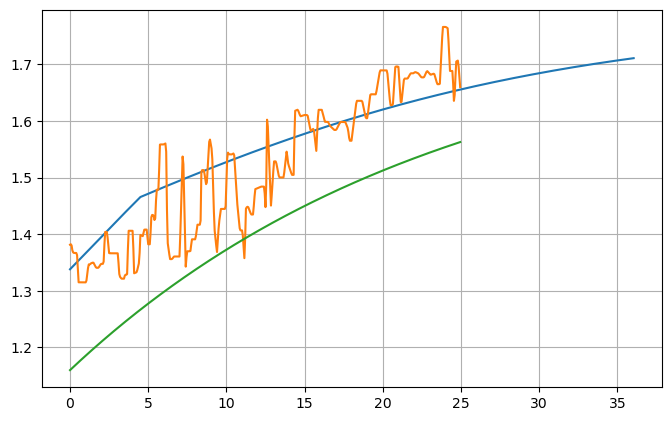

In [67]:
#Estimate the density evolution of the glacier using different models of firn and snow densificaiton
Ec = 60e3 #J/mol -> activation energy for creep
Eg = 42.4e3 #J/mol -> activation energy for grain grwoth
R_idgc = 8.3145 #JKmol Ideal Gas Constant
g_grav = 9.81 #m/s^2 -> Graviational Acceleration Earth
#g_grav = 0.113
rho_ice = 918.

rho_water = 1000.
alpha = 1.
beta = 0.5

T_0C = 273.
def T_kelvin(T_C):
    return T_C + T_0C

def ref_index(rho_gcm):
    return (1 + 0.845 * rho_gcm)

def drho_dt_NH(A, T, rho_0, dt): #Densification Rate Nabarro-Herring
    if rho_0 < 550.:
        return 0.07 * A * g_grav * np.exp((Eg - Ec)/(R_idgc*T)) * (rho_ice - rho_0)
    else:
        return 0.03 * A * g_grav * np.exp((Eg - Ec) / (R_idgc * T)) * (rho_ice - rho_0)

def eps_r(rho_gcm):
    return (1 + 0.845 * rho_gcm)**2

rho_fresh_snow = 100.
rho_set_snow = 400.
rho0 = rho_set_snow
A_aletsch_const = 50. #kg/m^3 -> 300 cm  / yr assuming rho = 92 kg/m^3
T_aletsch_C = -20.0
T_aletsch = T_kelvin(T_aletsch_C)

dt = 1. # 1 yr
nSteps = 500
yr = 365.25 * 3600 * 24.
depth = []
depth.append(0)

rho_list = []
t_list = []
#rho_list.append(rho_fresh_snow)
rho_list.append(rho0)
t_list.append(0)
for i in range(1,nSteps):
    rho_yr = rho_list[i-1] + drho_dt_NH(A_aletsch_const, T_aletsch, rho_list[i-1], dt)*dt
    #rho_yr = rho_list[i-1] + drho_dt_HL(A_aletsch_const, T_aletsch, rho_list[i-1])*dt
    dzdt = A_aletsch_const/rho_yr
    delta_z = dzdt*dt + depth[i-1]
    depth.append(delta_z)

    #print('rho = ', rho_yr, ' after ', dt*i, ' years')
    t_list.append(i*dt)
    rho_list.append(rho_yr)

depth_array = np.array(depth)
rho_array = np.array(rho_list)
t_array = np.array(t_list)

n_model = ref_index(rho_array/1000.)
n_interp = interp1d(depth_array, n_model)

#depth_space = np.arange(0, 50., 0.05)
#ref_index_profile = n_interp(depth_space)

def exponential_fit(z):
    return 1.78 - 0.*np.exp()

pl.figure(figsize=(8,5),dpi=100)
pl.plot(depth_array, n_model)
pl.plot(z_gul, n_gul)
pl.plot(z_gul, southpole(z_gul, 1.78, -0.62, -0.042))
pl.grid()
pl.show()